#    שם פרויקט: SURVEY LUNG CANCER

# מספר קבוצה: 22

# אנאבל שגיא, אוראל חיים

# Source

https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer

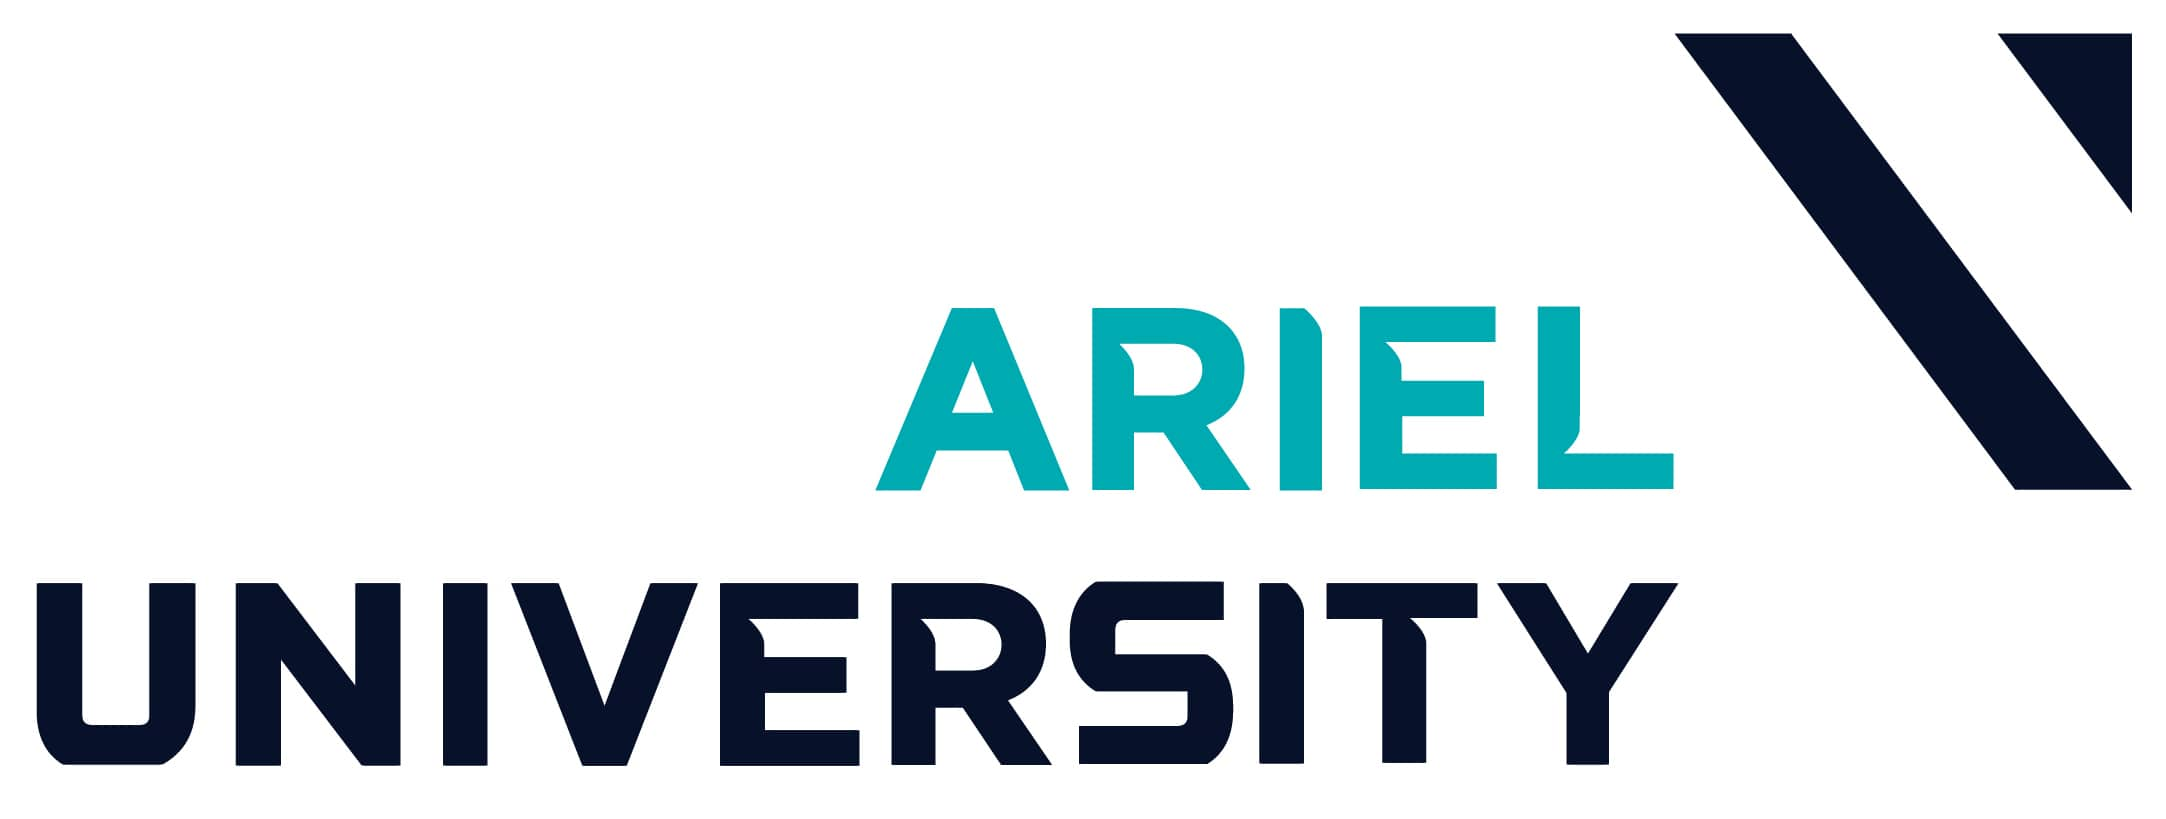

In [3]:
from IPython import display

display.Image("https://www.ariel.ac.il/sites/Navon-Venezia/img/Ariel_U_logo2.jpg")

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import sklearn as sk

In [211]:
url = 'https://raw.githubusercontent.com/anabellesagee/dataforLihi/main/survey%20lung%20cancer.csv'
df = pd.read_csv(url)

df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# Chapter 1 - Data Shaping

In [202]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

לא קיימים ערכים חסרים בדאטה

# טיפול בדאטה:

החלפת הערכים מהמספרים (2,1) למספרים (1,0) בהתאמה כאשר 1 הוא חיובי ו-0 הוא שלילי והשמה בדאטה פריים חדש

In [212]:
Cancer_New_df=df.replace({'SMOKING':{2:1, 1:0},'YELLOW_FINGERS':{2:1, 1:0},'ANXIETY':{2:1, 1:0},'PEER_PRESSURE':{2:1, 1:0},'CHRONIC DISEASE':{2:1, 1:0},'FATIGUE ':{2:1, 1:0},'ALLERGY ':{2:1, 1:0},'WHEEZING':{2:1, 1:0},'ALCOHOL CONSUMING':{2:1, 1:0},'COUGHING':{2:1, 1:0},'SHORTNESS OF BREATH':{2:1, 1:0},'SWALLOWING DIFFICULTY':{2:1, 1:0},'CHEST PAIN':{2:1, 1:0},'LUNG_CANCER':{'YES':1, 'NO':0}})

Cancer_New_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


חיתוך הדאטה לפי מי שחיובי לסרטן ריאות

In [213]:
df_True_Cancer=Cancer_New_df[(Cancer_New_df.LUNG_CANCER==1)]
df_True_Cancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
5,F,75,0,1,0,0,1,1,1,1,0,1,1,0,0,1
6,M,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,F,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


חיתוך הדאטה לפי מי שמעשן מתוך החיוביים לסרטן ריאות

In [111]:
df_True_Smoker=df_True_Cancer[(df_True_Cancer.SMOKING==1)]
df_True_Smoker

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
6,M,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,F,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
9,M,53,1,1,1,1,1,0,1,0,1,0,0,1,1,1
10,F,61,1,1,1,1,1,1,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,F,63,1,1,1,1,1,1,1,1,0,1,1,1,1,1
302,F,65,1,1,1,1,0,1,0,1,0,1,1,1,0,1
305,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1


#  Chapter 2 - Data Analyzing

M    162
F    147
Name: GENDER, dtype: int64


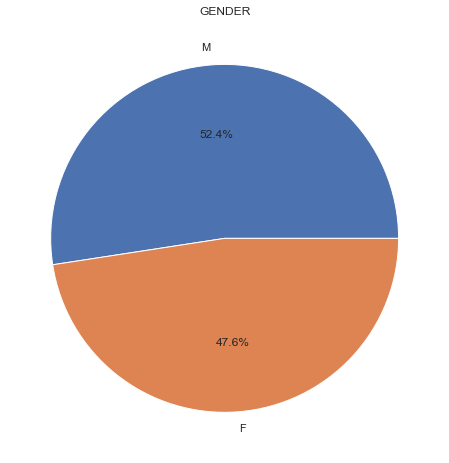

In [193]:
gender = df['GENDER'].value_counts()

print(gender)

plt.figure(figsize=(8,8))
plt.pie(gender,labels=gender.index,autopct='%1.1f%%')
plt.title("GENDER")
plt.show()

M    145
F    125
Name: GENDER, dtype: int64


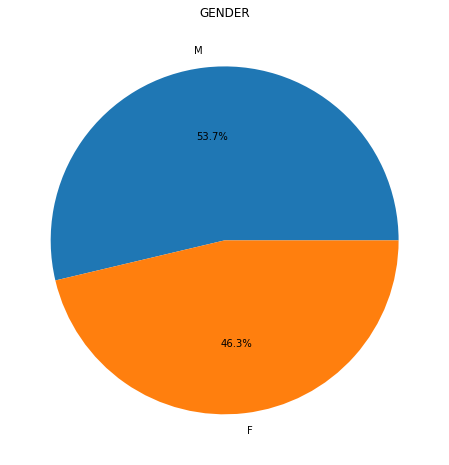

In [117]:
gender=df_True_Cancer['GENDER'].value_counts()

print(gender)

plt.figure(figsize=(8,8))
plt.pie(gender,labels=gender.index,autopct='%1.1f%%')
plt.title("GENDER")
plt.show()

M    85
F    70
Name: GENDER, dtype: int64


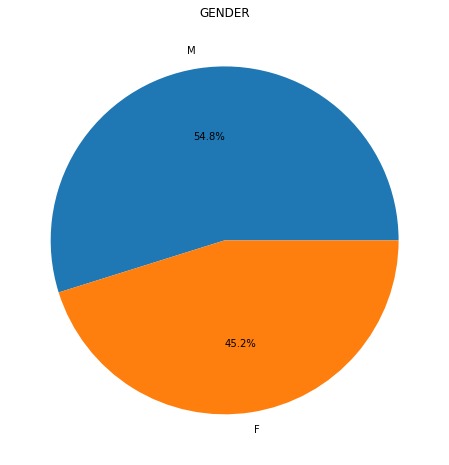

In [112]:
gender=df_True_Smoker['GENDER'].value_counts()

print(gender)

plt.figure(figsize=(8,8))
plt.pie(gender,labels=gender.index,autopct='%1.1f%%')
plt.title("GENDER")
plt.show()

ניתן להסיק כי אין הבדל מהותי בין המינים בקבלת סרטן ריאות

<AxesSubplot:>

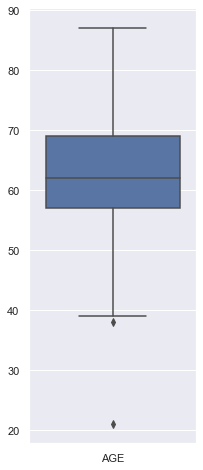

In [194]:
plt.figure(figsize=(3,8))
sns.boxplot(data = df[['AGE']])

In [196]:
df['AGE'].mean()

62.67313915857605

In [197]:
df['AGE'].median()

62.0

In [198]:
df['AGE'].mode()

0    64
dtype: int64

<AxesSubplot:>

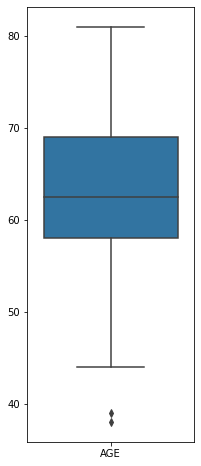

In [113]:
plt.figure(figsize=(3,8))
sns.boxplot(data = df_True_Cancer[['AGE']])

In [114]:
df_True_Cancer['AGE'].mean()

62.95185185185185

In [115]:
df_True_Cancer['AGE'].median()

62.5

In [116]:
df_True_Cancer['AGE'].std()

7.96655977350391

In [207]:
df_True_Cancer['AGE'].mode()

0    64
dtype: int64

ניתן לראות שטווח הגילאים בקרב החולים הוא בין 60 ל-70 כאשר הגיל השכיח הוא 64, הממוצע הוא 63, החציון 62.5 וסטיית התן היא 8. 

In [200]:
df_True_Cancer.groupby(by=['SMOKING'], dropna=True).count()

,GENDER,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
SMOKING,,,,,,,,,,,,,,,
0,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
1,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155


smoker       155
no-smoker    115
Name: SMOKING, dtype: int64


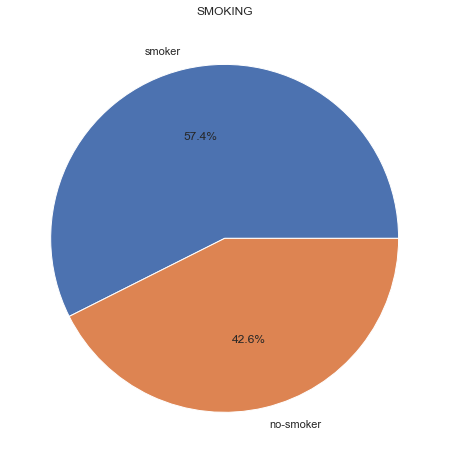

In [201]:
Smoking_df=df_True_Cancer.replace({'SMOKING':{1:"smoker", 0:"no-smoker"}})
smoker=Smoking_df['SMOKING'].value_counts()

print(smoker)

plt.figure(figsize=(8,8))
plt.pie(smoker,labels=smoker.index,autopct='%1.1f%%')
plt.title("SMOKING")
plt.show()

ניתן לראות כי אחוז המעשנים מתוך החולים הוא 57.4%

heatmap מחיקת עמודות לא רלוונטיות לצורך 

In [214]:

del Cancer_New_df['GENDER']
del Cancer_New_df['AGE']
Cancer_New_df

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,0,1,0,0,1,1,0,1,1,1,0,1,1


<AxesSubplot:>

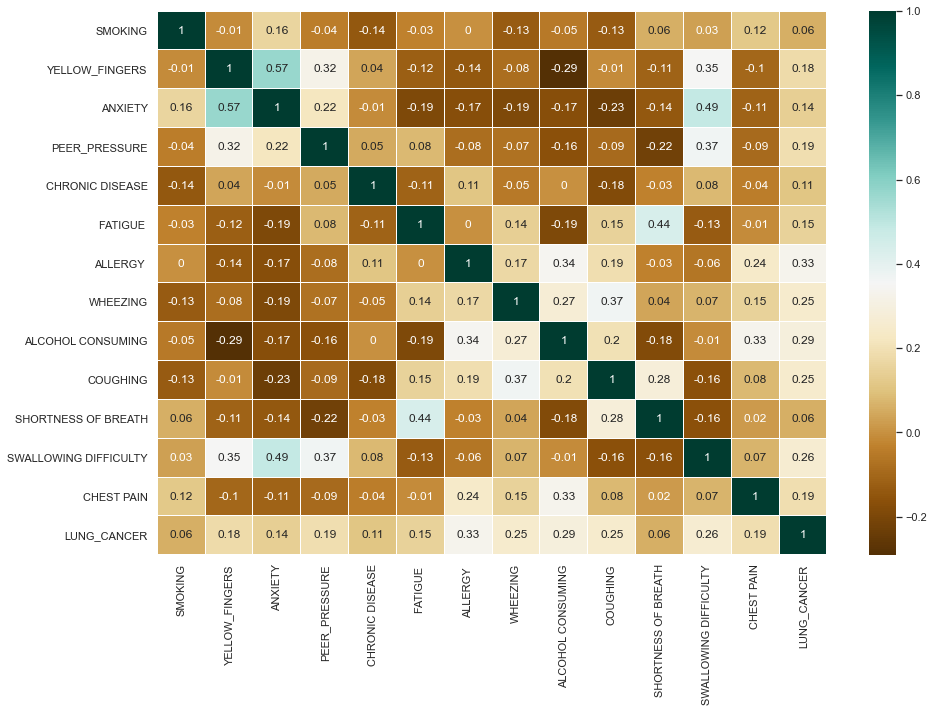

In [215]:
features=['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ','ALLERGY ','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER']
correlation_matrix = Cancer_New_df[features].corr().round(2)
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix,cmap='BrBG', annot=True,linewidths=0.01)

קשרים שליליים חזקים:
- צריכת אלכוהול ואצבעות צהובות
- שיעול ותשישות (לא נעסוק בקשר זה)
- קוצר נשימה ולחץ חברתי (לא נעסוק בקשר זה)
- צריכת אלכוהול ועייפות
- צריכת אלכוהול ולחץ חברתי

קשרים חיוביים חזקים:
- תשישות ואצבעות צהובות
- תשישות וקשיי בליעה
- עייפות וקוצר נשימה (לא נעסוק בקשר זה)
- ציפצופים בנשימה ושיעול (לא נעסוק בקשר זה)
- קשיי בליעה ולחץ חברתי (לא נעסוק בקשר זה)

נשים לב כי הקשרים של הסרטן הם כולם בערכים חיוביים ונשים עליהם את הדגש!

# קשרים חיוביים-

הקשר בין אצבעות צהובות לתשישות:

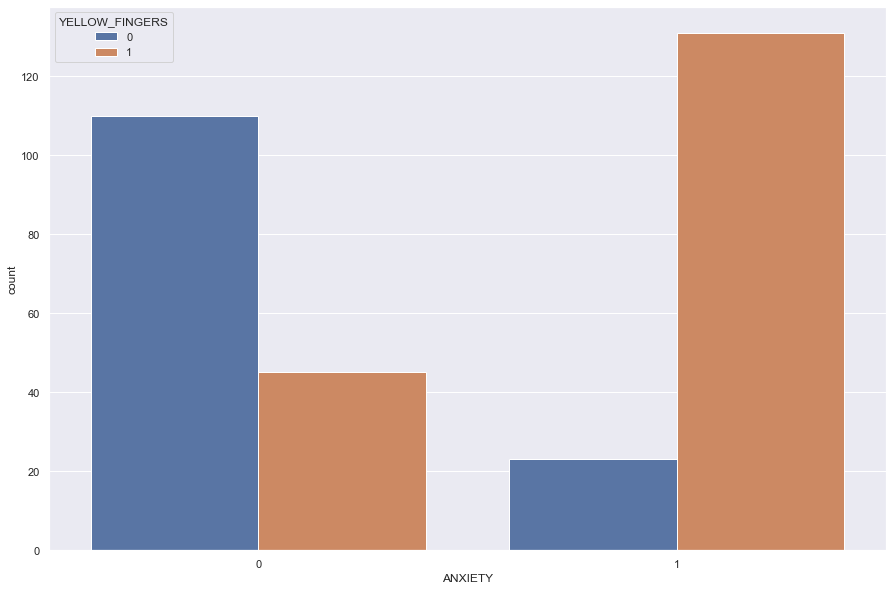

In [217]:
sns.countplot(x="ANXIETY", hue="YELLOW_FINGERS", data=Cancer_New_df)

plt.show()

הקשר בין קשיי בליעה לתשישות:

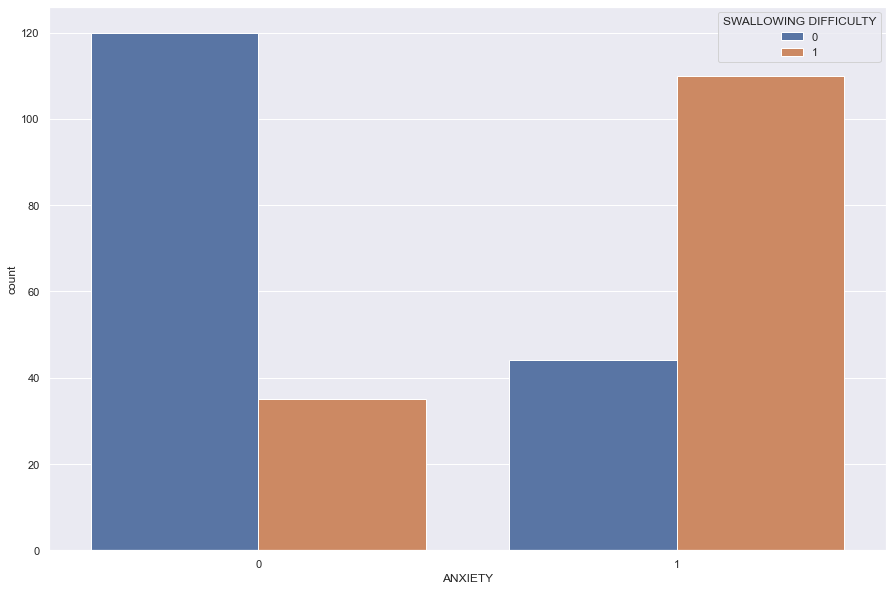

In [219]:
sns.countplot(x="ANXIETY", hue="SWALLOWING DIFFICULTY", data=Cancer_New_df)

plt.show()

# קשרים שליליים-

הקשר בין צריכת אלכוהול לאצבעות צהובות:

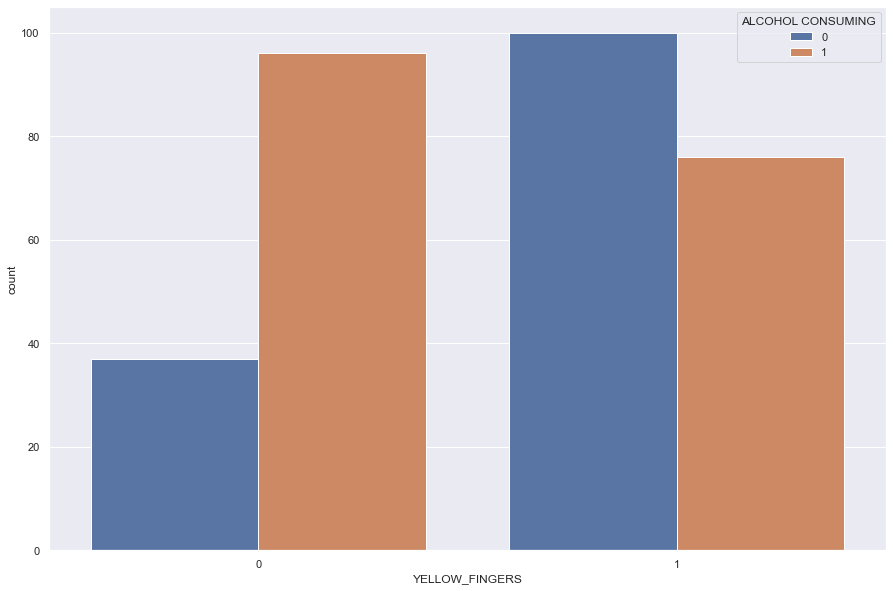

In [220]:
sns.countplot(x="YELLOW_FINGERS", hue="ALCOHOL CONSUMING", data=Cancer_New_df)
plt.show()

הקשר בין צריכת אלכוהול לעייפות:

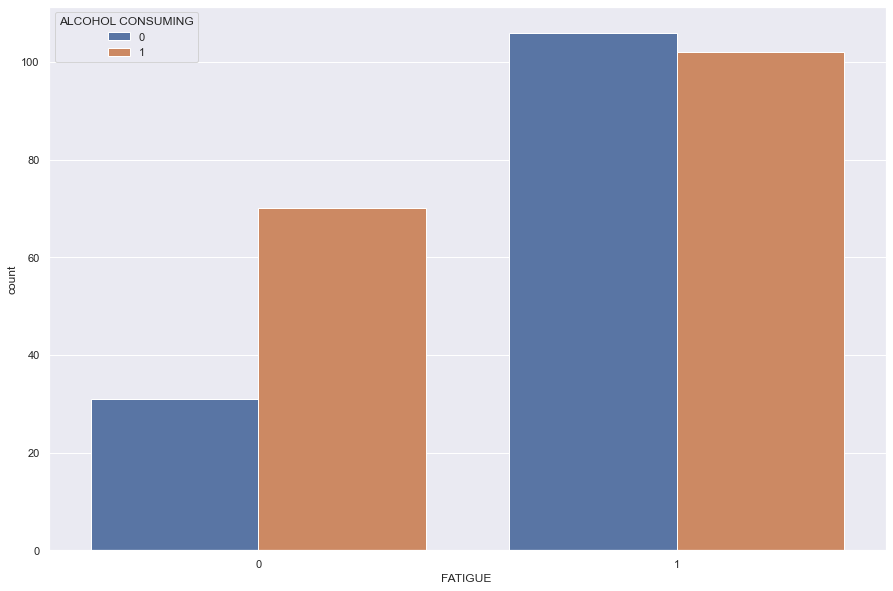

In [169]:
sns.countplot(x="FATIGUE ", hue="ALCOHOL CONSUMING", data=Cancer_New_df)
plt.show()

הקשר בין צריכת אלכוהול ללחץ חברתי:

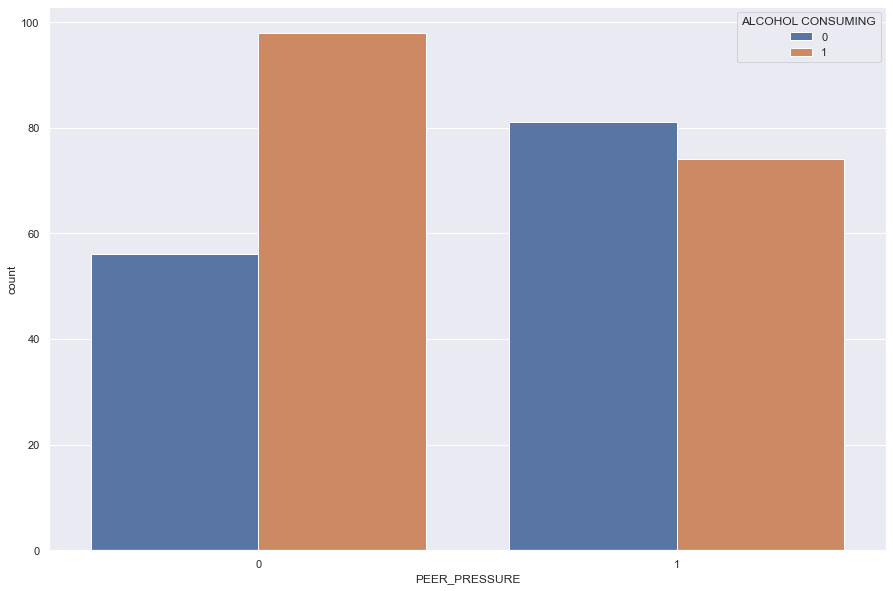

In [170]:
sns.countplot(x="PEER_PRESSURE", hue="ALCOHOL CONSUMING", data=Cancer_New_df)
plt.show()

# חיתוכי מידע הקשורים בסרטן

הקשר בין סרטן ריאות ואלרגיות:

1    167
0    103
Name: ALLERGY , dtype: int64


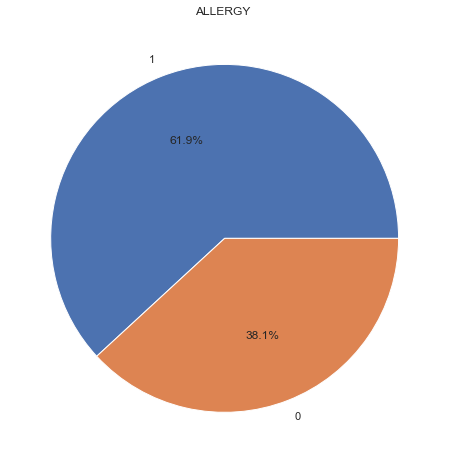

In [141]:
allergy=df_True_Cancer['ALLERGY '].value_counts()

print(allergy)

plt.figure(figsize=(8,8))
plt.pie(allergy,labels=allergy.index,autopct='%1.1f%%')
plt.title("ALLERGY ")
plt.show()

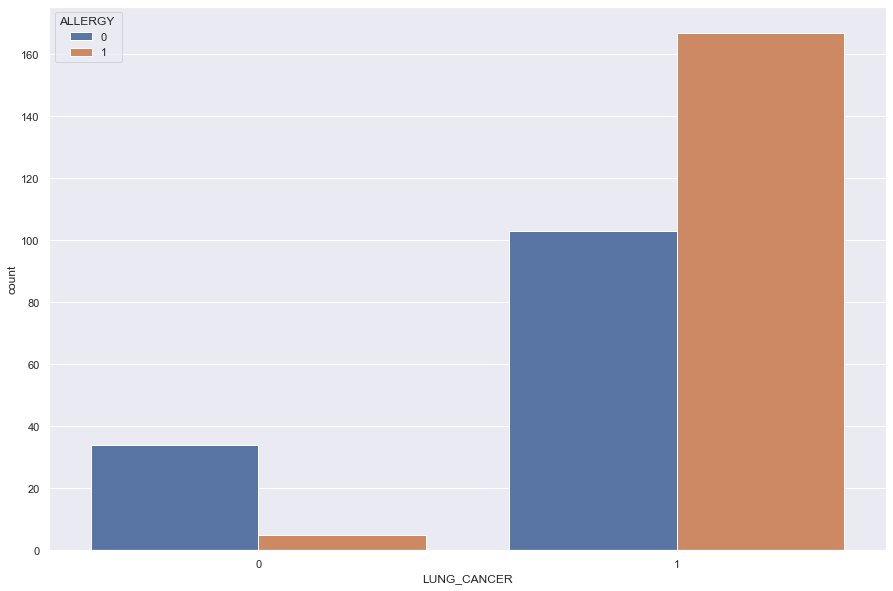

In [150]:
sns.countplot(x="LUNG_CANCER", hue="ALLERGY ", data=Cancer_New_df)

plt.show()

ניתן להסיק שבקרב האנשים שאינם חולים הרב המוחלט לא מתמודד עם אלרגיות, לעומת מי שכן חולים שאצלם הרב כן מתמודדים עם אלרגיות. 

הקשר בין סרטן ריאות וצריכת אלכוהול:

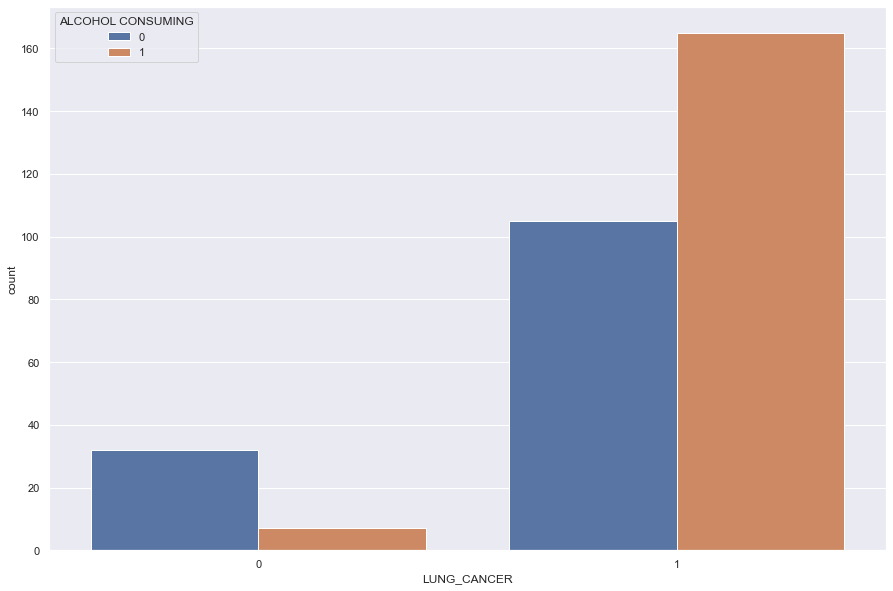

In [151]:
sns.countplot(x="LUNG_CANCER", hue="ALCOHOL CONSUMING", data=Cancer_New_df)
plt.show()

ניתן לראות כי יש קשר ישיר בין צריכת אלכוהול והתמודדות עם סרטן ריאות

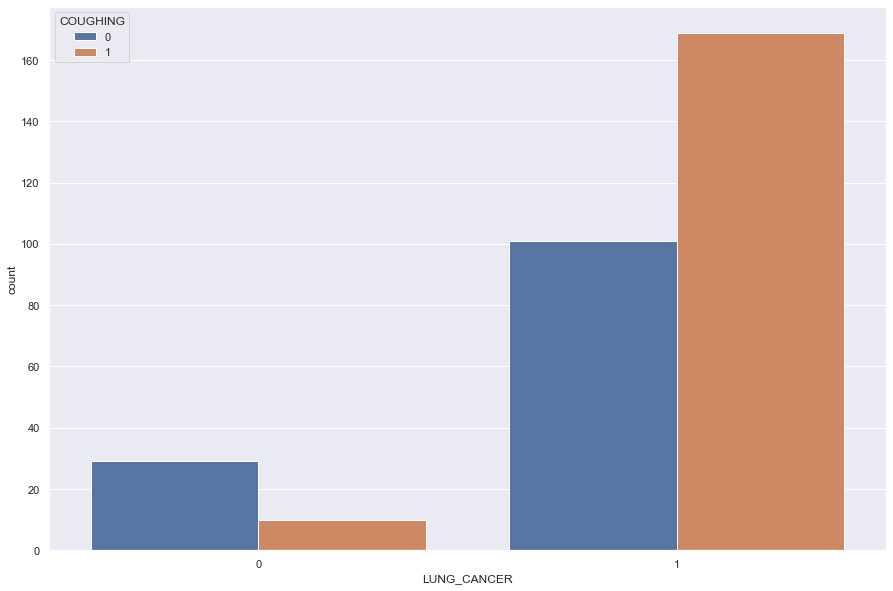

In [153]:
sns.countplot(x="LUNG_CANCER", hue="COUGHING", data=Cancer_New_df)
plt.show()

ניתן לראות כי יש קשר ישיר בין שיעול והתמודדות עם סרטן ריאות

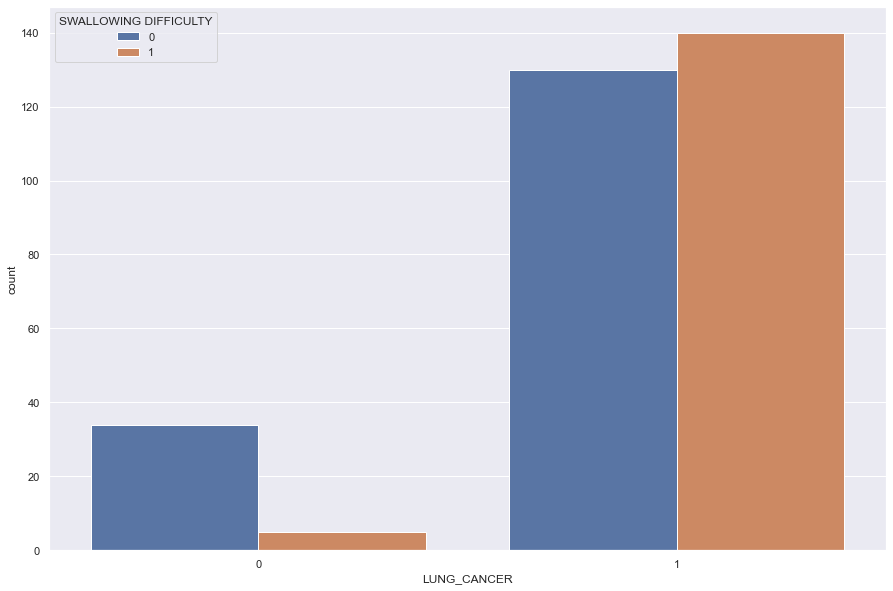

In [224]:
sns.countplot(x="LUNG_CANCER", hue="SWALLOWING DIFFICULTY", data=Cancer_New_df)
plt.show()

ניתן להבחין כי בקרב אנשים לא חולים, קשיי הבליעה כמעט ואינם קיימים, לעומת אצל אנשים חולים שאצלם התופעה הופכת לשכיחה יותר.

נוכל לראות בנוסף שהמתאם בהיטמאפ בין סרטן ריאות לציפצופים בנשימה ולכאבים בחזה הוא חיובי ולכן הקשר ביניהם הוא חזק!.

# Chapter 3 - SMOKING, ALCOHOL and PEER PRESSURE

רצינו לנצל את ההזמנות ולסטות מהנושא כדי להבחין בנתונים המקשרים בין עישון, צריכת אלכוהול ולחץ חברתי.

<AxesSubplot:>

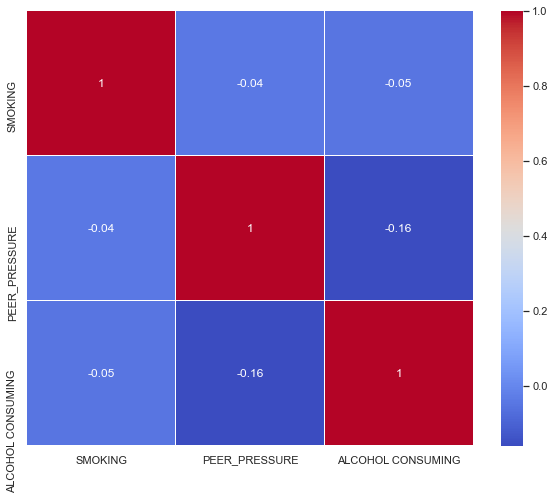

In [173]:
features=['SMOKING','PEER_PRESSURE','ALCOHOL CONSUMING']
correlation_matrix = Cancer_New_df[features].corr().round(2)
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data=correlation_matrix,cmap='coolwarm', annot=True,linewidths=0.01)

ציפינו שנקבל קשרים חיוביים או ניטרלים אך קיבלנו רק נתונים שליליים. נוכל רק לשער במקרה הזה- אולי המעשנים ואלו שצורכים אלכוהול לא יעידו על עצמם ככאלה שמושפעים מלחץ חברתי. או אולי קיים חוסר אמינות לגבי הנתונים, כלומר אנשים שמעשנים או שותים סימנו שהם לא שותים או מעשנים. 

#  Chapter 4 - Cancer Check Function

בנינו פונקצייה שמחזירה האם העונה לשאלון צריך להבדק במטרה לשלול סרטן ריאות. זאת על פי הנתונים ששמורים במילון שנלקחו מהמתאמים בהיטמאפ. במידה והסיכון הוא נמוך, היא תחזיר שאין דאגה, במידה והסיכון הוא סביר היא תמליץ להבדק ליתר ביטחון ובמידה והסיכון הוא גבוה היא תחזיר שדרושה בדיקה דחופה. 

In [1]:

def Cancer_Check(sum_grade):
    if sum_grade < 40:
        return('no worries')
    if sum_grade >= 40 and sum_grade < 80:
        return('get health check')
    if sum_grade>=80:
        return('necessary check')
 
d={'SMOKING':6,'YELLOW_FINGERS':18,'ANXIETY':14,'PEER_PRESSURE':19,'CHRONIC DISEASE':11,'FATIGUE ':15,'ALLERGY ':33,'WHEEZING':25,'ALCOHOL CONSUMING':29,'COUGHING':25,'SHORTNESS OF BREATH':6,'SWALLOWING DIFFICULTY':26,'CHEST PAIN':19}
 
sum_grade=0
for i in d.keys():
    vi=input("dealing with "+ i +"?")
    if vi=='v' or vi=='V':
        sum_grade=d[i]+sum_grade
 
Cancer_Check(sum_grade)


dealing with SMOKING? v
dealing with YELLOW_FINGERS? x
dealing with ANXIETY? v
dealing with PEER_PRESSURE? x
dealing with CHRONIC DISEASE? x
dealing with FATIGUE ? v
dealing with ALLERGY ? x
dealing with WHEEZING? x
dealing with ALCOHOL CONSUMING? v
dealing with COUGHING? x
dealing with SHORTNESS OF BREATH? x
dealing with SWALLOWING DIFFICULTY? x
dealing with CHEST PAIN? x


'get health check'